In [1]:
#IMPORTACIÓN DE LIBRERÍAS PERTINENTES
%matplotlib ipympl
#What does this mean and why can't I comment in front of it? [?]

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim #IDK HOW TO USE THIS [!]
from scipy import integrate

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
m = 0.1 #Kg
r = 0.1 #m
d = 0.3 #m
g = 9.81 #m/s^2

In [3]:
I0 = ((m*(r**2))/4) + (m*(d**2))
Iz = ((m*(r**2))/2)

In [4]:
y0 = np.array([0,0,((np.pi)/4),0]) #y =[φ,ψ,θ,dθdt]
t = np.linspace(0,8,10000) #0s a 8s en 10000 pasos
dψdt = 400 #rad/s

In [5]:
pφ = Iz*dψdt*np.cos(y0[2])
pψ = Iz*dψdt

In [6]:
#y =[φ,ψ,θ,dθdt]
def System(y, t, dψdt):

    φ,ψ,θ,θ_punto = y

    dψdt = dψdt
    #dφdt = dφdt
    dθdt = θ_punto
    #dθ_puntodt = dθ_puntodt

    dφdt = ( pφ - ( Iz*dψdt*(np.cos(θ)) ) ) / ( ( I0*((np.sin(θ))**2) ) + ( Iz*((np.cos(θ))**2) ) )
    dψdt = ( pψ - ( Iz*dφdt*(np.cos(θ)) ) ) / Iz
    dθ_puntodt = ( ((dψdt**2)*(np.sin(θ))*(np.cos(θ))*(I0-Iz)) - (dφdt*dψdt*Iz*(np.sin(θ))) + (m*g*d*(np.sin(θ))) ) / I0

    return np.array([dφdt, dψdt, dθdt, dθ_puntodt])

In [7]:
solución_mejorada = integrate.odeint(System, y0, t, args=(dψdt,))

In [8]:
#fixed_system_to_body_system = np.array([[((np.cos(ψ)*np.cos(φ))-(np.cos(θ)*np.sin(φ)*np.sin(ψ))),((-np.sin(ψ)*np.cos(φ))-(np.cos(θ)*np.sin(φ)*np.cos(ψ))),(np.sin(θ)*np.sin(φ))],[((np.cos(ψ)*np.sin(φ))+(np.cos(θ)*np.cos(φ)*np.sin(ψ))),((-np.sin(ψ)*np.sin(φ))-(np.cos(θ)*np.cos(φ)*np.cos(ψ))),(-np.sin(θ)*np.cos(φ))],[(np.sin(ψ)*np.sin(θ)),(np.cos(ψ)*np.sin(θ)),(np.cos(θ))]])
#body_system_to_fixed_system = np.linalg.inv(fixed_system_to_body_system)
#np.shape(fixed_system_to_body_system, body_system_to_fixed_system)

In [9]:
#scale = 100
#t1 = t[::scale]

#φ = φ[::scale]
#ψ = ψ[::scale]
#θ = θ[::scale]

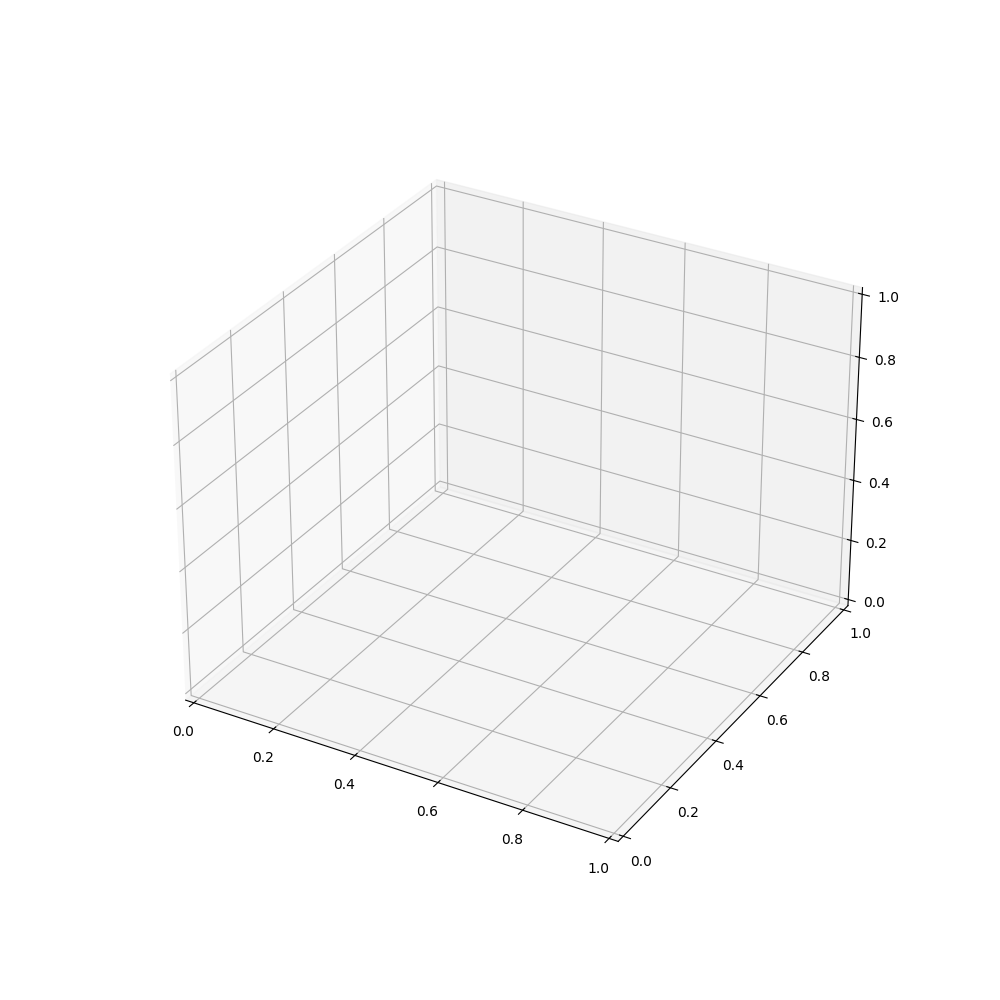

In [10]:
plt.ion()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

def init():
    ax.clear()
    ax.set_xlim(-0.5,0.5)
    ax.set_ylim(-0.5,0.5)
    ax.set_zlim(-0.5,0.5)

def update(i):

    init()

    φ = solución_mejorada[:i,0]
    ψ = solución_mejorada[:i,1]
    θ = solución_mejorada[:i,2]
    
    x = d*np.sin(θ)*np.cos(φ)
    y = d*np.sin(θ)*np.sin(φ)
    z = d*np.cos(θ)

    ax.scatter(x,y,z)

    #ax.legend()

animation = anim.FuncAnimation(fig=fig, func=update, frames=10000, init_func=init)
plt.show()